In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

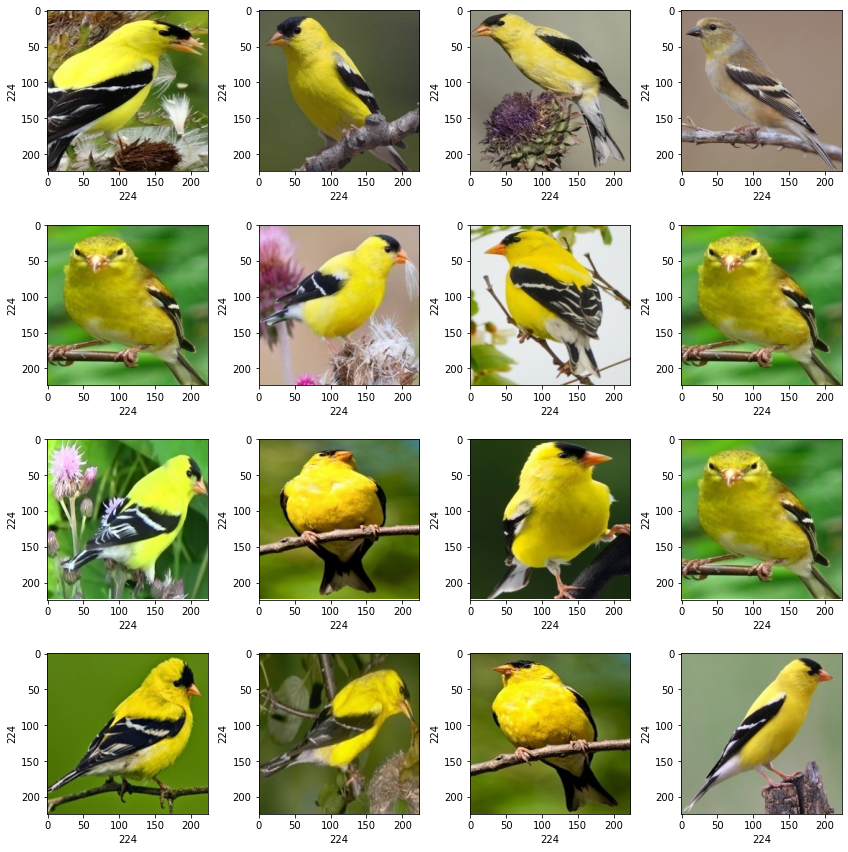

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [6]:
# Setting path and creating empty list
dir = "/content/drive/My Drive/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [7]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [8]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
CARMINE BEE-EATER     131
BARN OWL              129
DOWNY WOODPECKER        3
dtype: int64

In [9]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

4

In [10]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [11]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(406,)

In [12]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [13]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

In [14]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER']


In [15]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [17]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 32)      

In [18]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [19]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 1.3144 - accuracy: 0.3089 - val_loss: 1.1256 - val_accuracy: 0.4000
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 1.1352 - accuracy: 0.4402 - val_loss: 1.0949 - val_accuracy: 0.5231
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 1.0645 - accuracy: 0.5946 - val_loss: 0.9432 - val_accuracy: 0.5692
Epoch 4/50
3/3 [==============================] - 5s 2s/step - loss: 0.9518 - accuracy: 0.6332 - val_loss: 0.9064 - val_accuracy: 0.6154
Epoch 5/50
3/3 [==============================] - 5s 2s/step - loss: 0.9134 - accuracy: 0.6100 - val_loss: 0.8540 - val_accuracy: 0.6462
Epoch 6/50
3/3 [==============================] - 5s 1s/step - loss: 0.8219 - accuracy: 0.6873 - val_loss: 0.7809 - val_accuracy: 0.6769
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 0.7326 - accuracy: 0.6834 - val_loss: 0.8216 - val_accuracy: 0.5692
Epoch 8/50
3/3 [=========================

In [20]:
# Saving model
model.save("/content/drive/My Drive/bird_species.h5")

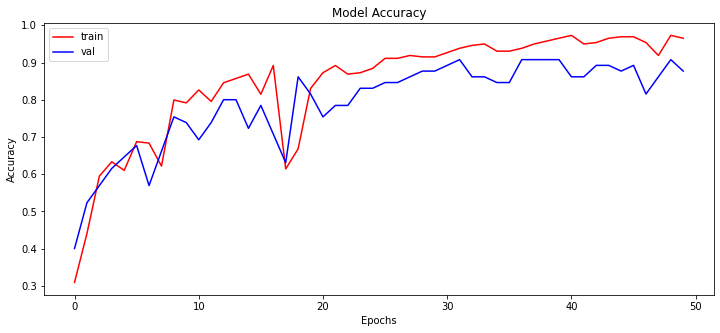

In [21]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

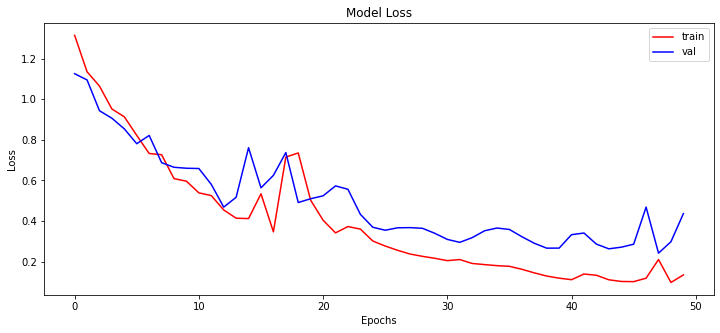

In [22]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [23]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

3/3 [==============================] - 1s 188ms/step - loss: 0.2759 - accuracy: 0.8902
Test Accuracy: 89.02438879013062


In [24]:
# Storing predictions
y_pred = model.predict(x_test)

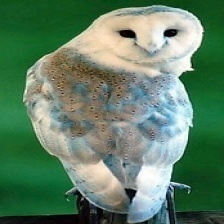

In [25]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

In [26]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER']
Originally :  BARN OWL
Predicted :  BARN OWL


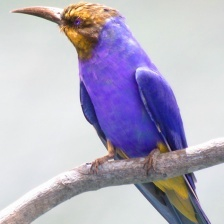

In [27]:
# Plotting image to compare
img1 = array_to_img(x_test[7])
img1

In [28]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[7])])
print("Predicted : ",labels[np.argmax(y_pred[7])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER']
Originally :  CARMINE BEE-EATER
Predicted :  CARMINE BEE-EATER


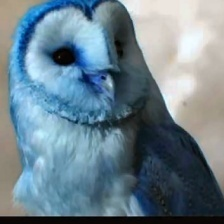

In [29]:
# Plotting image to compare
img2 = array_to_img(x_test[20])
img2

In [30]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[20])])
print("Predicted : ",labels[np.argmax(y_pred[20])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER']
Originally :  BARN OWL
Predicted :  BARN OWL


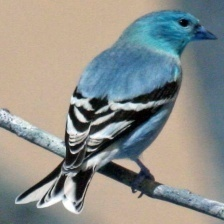

In [31]:
# Plotting image to compare
img3 = array_to_img(x_test[51])
img3

In [32]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[51])])
print("Predicted : ",labels[np.argmax(y_pred[51])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER']
Originally :  AMERICAN GOLDFINCH
Predicted :  AMERICAN GOLDFINCH


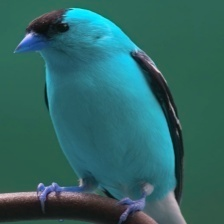

In [33]:
# Plotting image to compare
img4 = array_to_img(x_test[79])
img4

In [34]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[79])])
print("Predicted : ",labels[np.argmax(y_pred[79])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER']
Originally :  AMERICAN GOLDFINCH
Predicted :  AMERICAN GOLDFINCH
